In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import sqrt, arange
from scipy import stats
%matplotlib inline

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
student = pd.read_csv('C:\\Users\\uppup\\PycharmProjects\\Data-science\\TextBook - Become a Python Data Analyst\\Data\\student\\student.csv', sep=";")

In [ ]:
student.head()

In [ ]:
student.rename(columns={'sex' : 'gender'}, inplace=True)
student['alcohol_index'] = (5*student['Dalc'] + 2*student['Walc']) / 7
student['alc'] = student['alcohol_index'] <= 2
student['alc'] = student['alc'].map({True: 'Low', False:'High'})

In [ ]:
sample_size = student.shape[0]
sample_size

In [ ]:
sample_mean_grade = student['G3'].mean()
sample_mean_grade

In [ ]:
std_error_grades = student['G3'].std()/sqrt(sample_size)
stats.norm.interval(0.95, loc=sample_mean_grade,scale=std_error_grades)

In [ ]:
student['alc'].value_counts(normalize=True)

In [ ]:
high_prop = student['alc'].value_counts(normalize=True)['High']
std_error_prop = sqrt(high_prop*(1-high_prop)/sample_size)

In [ ]:
stats.norm.interval(0.98, loc=high_prop,scale=std_error_prop)

In [14]:
stats.binom.pmf(k=5, n=10, p=0.25)

0.058399200439453194

In [25]:
def plot_probs_n(n):
    fig, ax = plt.subplots(1,2, figsize = (14,4))
    ax[0].bar(x=arange(n+1), height=stats.binom.pmf(k=arange(n+1), n=n, p=0.25))
    ax[0].set_xticks(arange(n+1))
    ax[0].set_title('Probability mass function')
    ax[1].plot(stats.binom.cdf(k=range(n+1), n=n, p=0.25))
    ax[1].set_xticks(arange(n+1))
    ax[1].set_title('Cumulative distribution function')

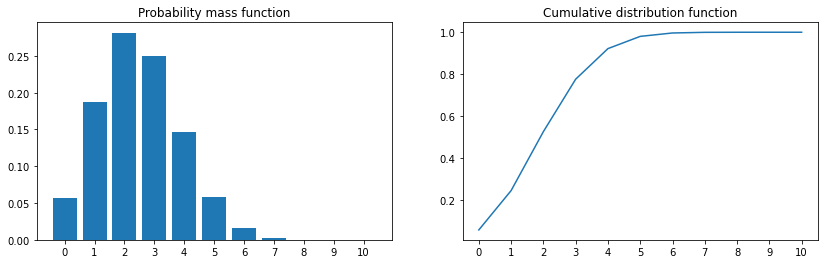

In [26]:
plot_probs_n(10)

In [28]:
student.groupby('alc')['G3'].var()

alc
High    11.151406
Low      9.765917
Name: G3, dtype: float64

In [29]:
grades_low_alc = student['G3'][student['alc']=='Low']
grades_high_alc = student['G3'][student['alc']=='High']
stats.bartlett(grades_low_alc, grades_high_alc)

BartlettResult(statistic=1.102508591338272, pvalue=0.293716231811652)

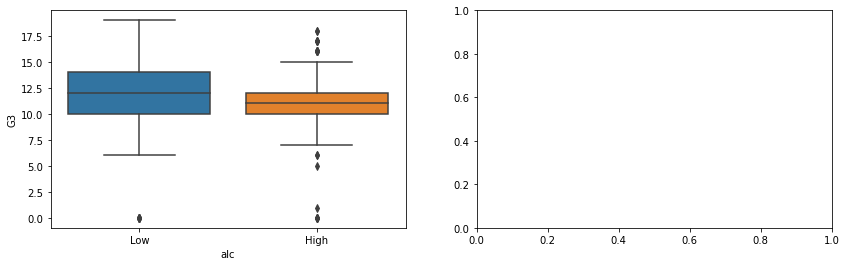

In [46]:
fig, axes = plt.subplots(1,2, figsize = (14,4))
sns.boxplot(x='alc', y='G3', data=student, ax=axes[0])
# sns.pointplot(x='alc', y='G3', data=student, ax=axes[1]);

In [43]:
stats.ttest_ind(grades_low_alc, grades_high_alc, equal_var=True)

Ttest_indResult(statistic=4.621320706949354, pvalue=4.6036088303692694e-06)

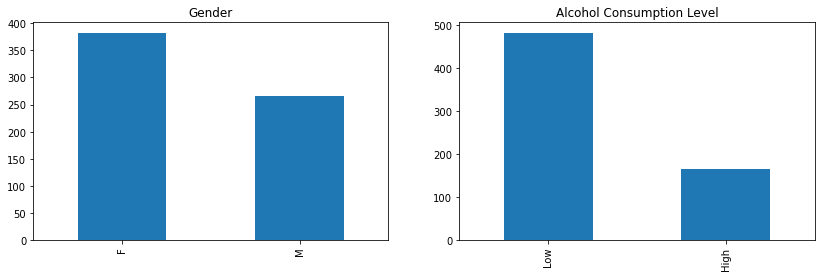

In [44]:
fig, axes = plt.subplots(1,2, figsize = (14,4))
student['gender'].value_counts().plot(kind='bar', ax=axes[0], title='Gender')
student['alc'].value_counts().plot(kind='bar', ax=axes[1], title='Alcohol Consumption Level');

In [33]:
gender_alc_table = pd.crosstab(student['alc'], student['gender'])
gender_alc_table

gender,F,M
alc,,
High,62,104
Low,321,162


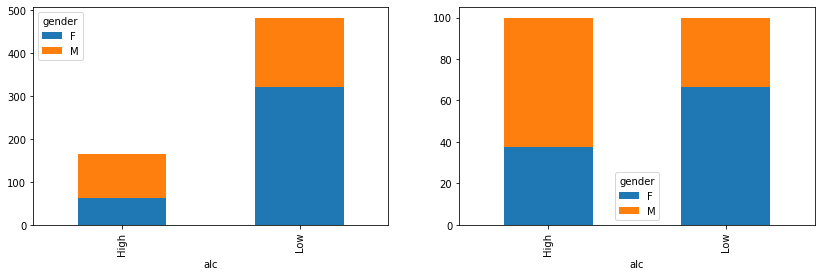

In [34]:
fig, axes = plt.subplots(1,2, figsize = (14,4))
gender_alc_table.plot(kind='bar', stacked=True, ax=axes[0]);
(100*(gender_alc_table.T/gender_alc_table.apply(sum, axis=1)).T).plot(kind='bar', stacked=True, ax=axes[1]);

In [37]:
chi_stat, p_value, dof, expected = stats.chi2_contingency(gender_alc_table)

In [38]:
p_value

8.72933011769437e-11

In [40]:
expected_table = pd.DataFrame(expected, index=['High','Low'], columns=['F','M'])
expected_table

,F,M
High,97.96302,68.03698
Low,285.03698,197.96302


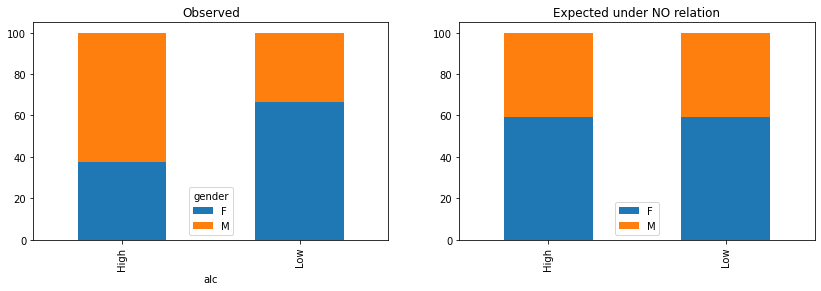

In [41]:
fig, axes = plt.subplots(1,2, figsize = (14,4))
(100*(gender_alc_table.T/gender_alc_table.apply(sum, axis=1)).T)\
.plot(kind='bar', stacked=True, title='Observed', ax=axes[0]);

(100*(expected_table.T/expected_table.apply(sum, axis=1)).T)\
.plot(kind='bar', stacked=True, title='Expected under NO relation', ax=axes[1]);
